## I. Perkenalan

Nama : Arya Bandoro

FTDS 004

## II. Import Pustaka Yang Dibutuhkan 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## III. Data Loading

In [2]:
data_awal = pd.read_csv(r'C:\Users\Acer\OneDrive\Documents\Hacktiv8\Phase 1\Week 2\Graded Challenge\Data.csv')

In [3]:
data_awal

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
data_awal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [5]:
data_awal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## IV. Data Exploration

Selanjutnya Dapat Kita Cari kesalahan pada data/mengetahui data ini lebih dalam dengan cara sebagai berikut ini


In [6]:
data_awal

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
data_awal.value_counts()

age   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
40.0  0        90                        0         35                 0                    255000.0   1.1               136           1    1        212   0              1
65.0  1        160                       1         20                 0                    327000.0   2.7               116           0    0        8     1              1
               128                       1         30                 1                    297000.0   1.6               136           0    0        20    1              1
               113                       1         60                 1                    203000.0   0.9               140           0    0        94    0              1
               68                        1         60                 1                    304000.0   0.8               140           1    0        79

<AxesSubplot:>

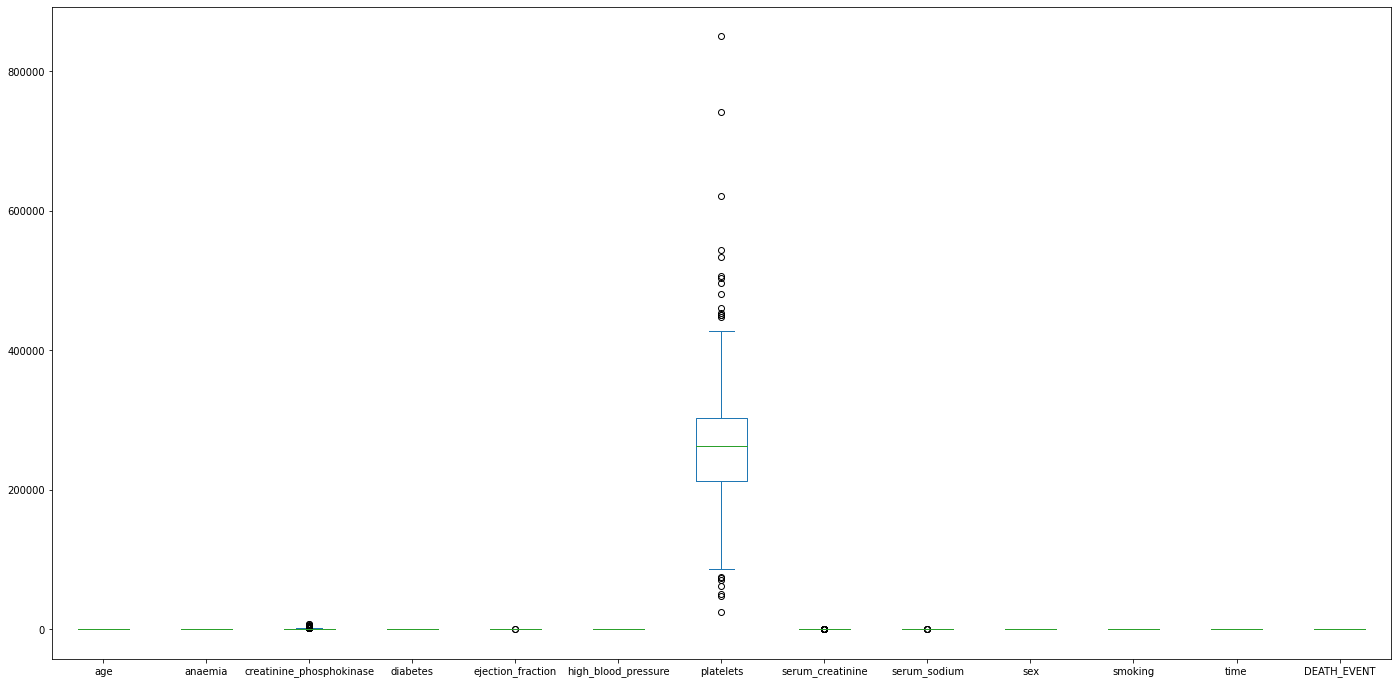

In [8]:
data_awal.plot.box(figsize=(24,12))

Selanjutnya Dapat kita cek persebaran datanya dengan cara berikut ini

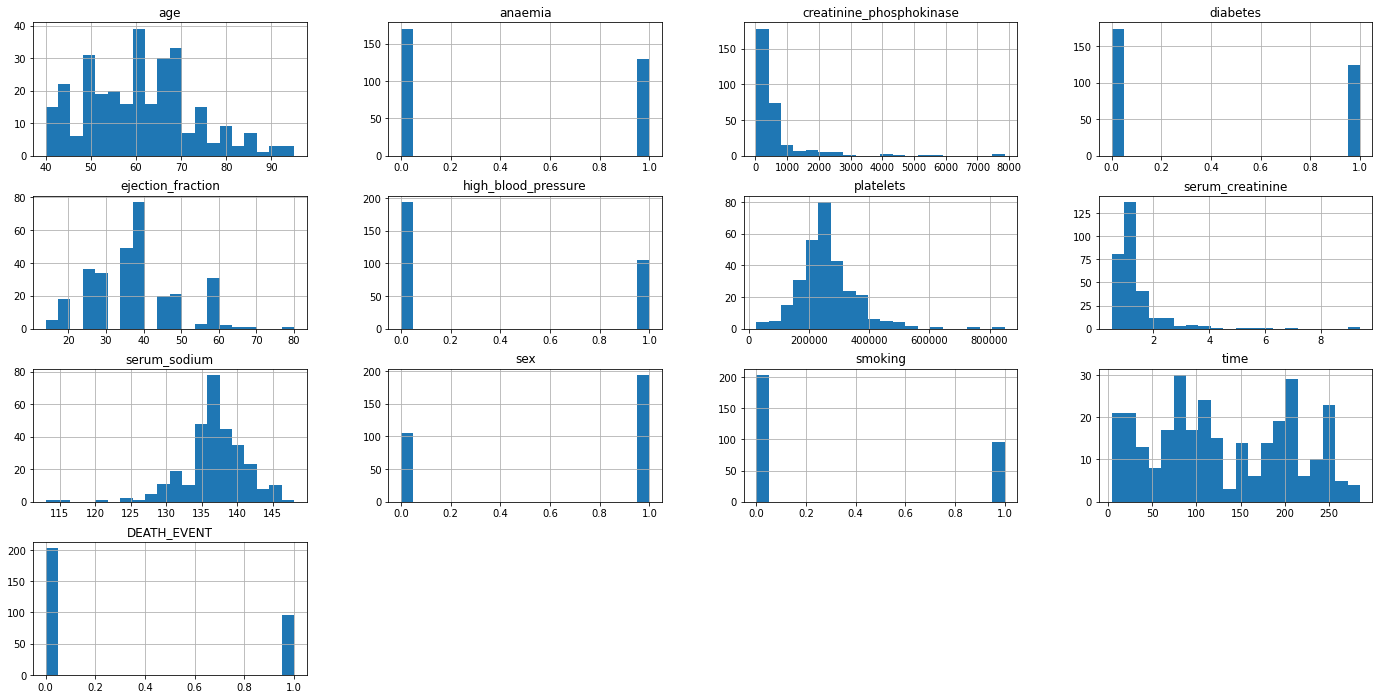

In [9]:
data_awal.hist(figsize=(24,12),bins=20)
plt.show()

In [10]:
data_awal.isna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data_awal.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## V. Data Cleaning

In [12]:
data_awal

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Karena kita tidak butuh kolom creatine dan juga platelets dan time maka dapat kita masukan kodingan sebagai berikut ini

In [13]:
data_bersih = data_awal.drop(columns=['creatinine_phosphokinase','platelets','time','ejection_fraction'])

In [14]:
data_bersih

,age,anaemia,diabetes,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,0,1,1.9,130,1,0,1
1,55.0,0,0,0,1.1,136,1,0,1
2,65.0,0,0,0,1.3,129,1,1,1
3,50.0,1,0,0,1.9,137,1,0,1
4,65.0,1,1,0,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...
294,62.0,0,1,1,1.1,143,1,1,0
295,55.0,0,0,0,1.2,139,0,0,0
296,45.0,0,1,0,0.8,138,0,0,0
297,45.0,0,0,0,1.4,140,1,1,0


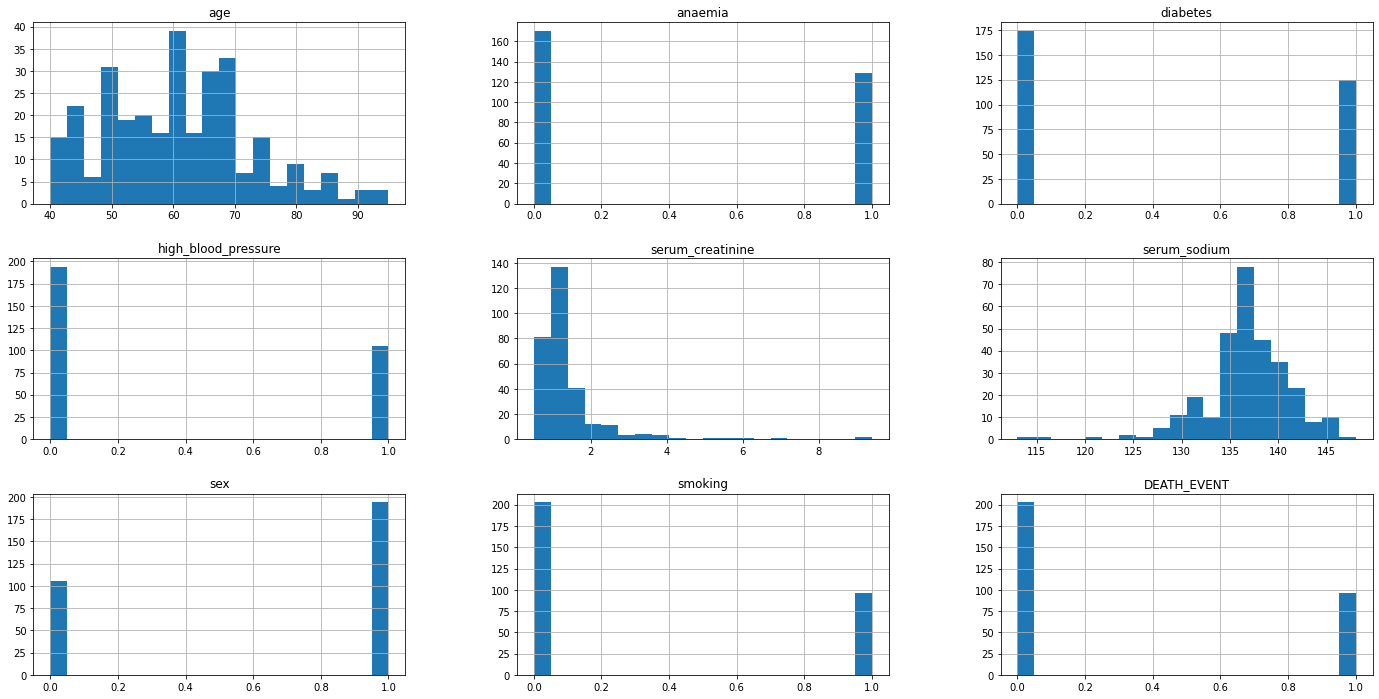

In [15]:
data_bersih.hist(figsize=(24,12),bins=20)
plt.show()

In [16]:
data_bersih.isna().sum()

age                    0
anaemia                0
diabetes               0
high_blood_pressure    0
serum_creatinine       0
serum_sodium           0
sex                    0
smoking                0
DEATH_EVENT            0
dtype: int64

In [17]:
data_bersih.isnull().sum()

age                    0
anaemia                0
diabetes               0
high_blood_pressure    0
serum_creatinine       0
serum_sodium           0
sex                    0
smoking                0
DEATH_EVENT            0
dtype: int64

<AxesSubplot:>

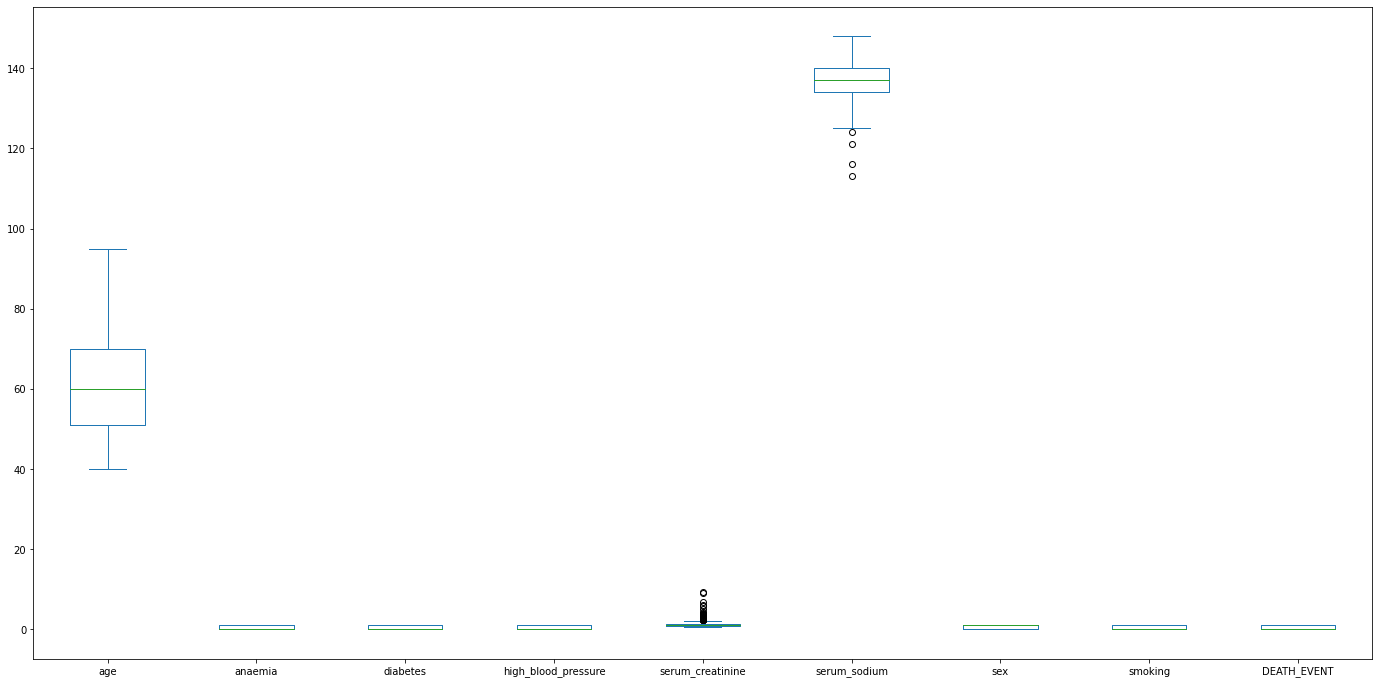

In [18]:
data_bersih.plot.box(figsize = (24,12))

## VI. Data Preprocessing

Selanjutnya untuk data preprocessing ini dapat kita cari korelasi antar data maka didapatkan perintah 

In [19]:
plt.figure(figsize=(10,10))
korelasi = data_bersih.corr()
korelasi

,age,anaemia,diabetes,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.101012,0.093289,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.012729,0.038182,0.052174,0.041882,-0.094769,-0.107290,0.066270
diabetes,-0.101012,-0.012729,1.000000,-0.012732,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
high_blood_pressure,0.093289,0.038182,-0.012732,1.000000,-0.004935,0.037109,-0.104615,-0.055711,0.079351
serum_creatinine,0.159187,0.052174,-0.046975,-0.004935,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,-0.089551,0.037109,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,-0.157730,-0.104615,0.006970,-0.027566,1.000000,0.445892,-0.004316
smoking,0.018668,-0.107290,-0.147173,-0.055711,-0.027414,0.004813,0.445892,1.000000,-0.012623
DEATH_EVENT,0.253729,0.066270,-0.001943,0.079351,0.294278,-0.195204,-0.004316,-0.012623,1.000000


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Korelasi Data')

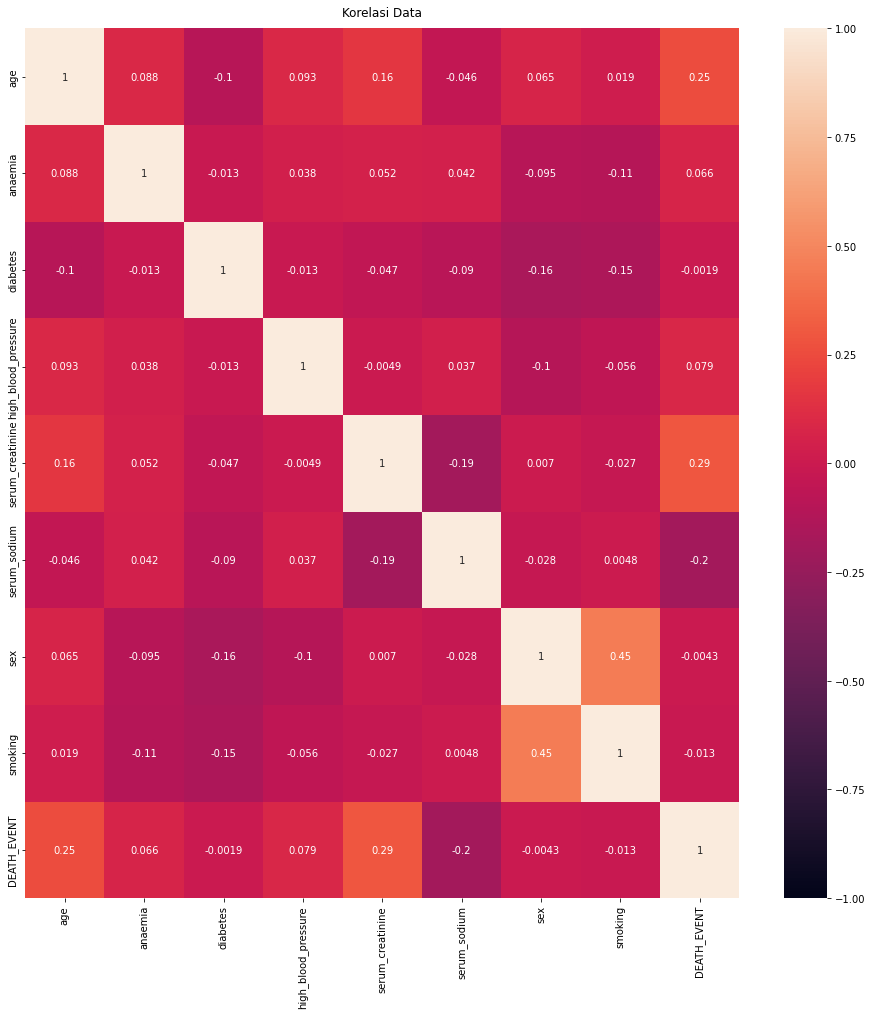

In [20]:
plt.figure(figsize=(16,16))
heatmap = sns.heatmap(data_bersih.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Korelasi Data', fontdict={'fontsize':12}, pad=12)


## VII. Pembuatan Model

Pertama kita perlu mendifinisikan x dan juga y nya

In [50]:
X = data_bersih.drop('DEATH_EVENT',axis=1).copy()
y = data_bersih['DEATH_EVENT'].copy()

Lalu lakukan training data dan juga cek dari datanya

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
X_test.shape

(60, 8)

In [53]:
X_train.shape

(239, 8)

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [55]:
xgb_clf = XGBClassifier()

## VIII. Pelatihan Model

Selanjutnya kita perlu untuk melakukan pelatihan pada datanya

In [56]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, random_state=42)

In [57]:
xgb_clf.fit(X_train, y_train)

[17:40:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## IX. Evaluasi Model

In [67]:
prediksi_random_forest = rnd_clf.predict(X_test)

In [70]:
print('Akurasi Dari Model Random Forest : {:.4f}'.format(accuracy_score(y_test, prediksi_random_forest)))

Akurasi Dari Model Random Forest : 0.6833


In [65]:
prediksi_boost = xgb_clf.predict(X_test)

In [66]:
print('Akurasi Dari Model Boost: {:.4f}'.format(accuracy_score(y_test, prediksi_boost)))

Akurasi Dari Model Boost: 0.7500


## X. Model Inference

Selanjutnya dapat kita cari dengan menggunakan prediksi dengan cara sebagai berikut ini

In [72]:
masukan = X.sample()

In [73]:
masukan

,age,anaemia,diabetes,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking
94,58.0,0,1,1,0.7,142,0,0


In [74]:
cek_prediksi_random = rnd_clf.predict(masukan)

In [75]:
cek_prediksi_random

array([0], dtype=int64)

In [76]:
cek_prediksi_boost = xgb_clf.predict(masukan)

In [77]:
cek_prediksi_boost

array([0], dtype=int64)

## XI. Pengambilan Kesimpulan 

### Didapatkan dari data tersebut bahawa akurasi dari random forest didapatkan sebesar 68% sedangkan akurasi dari boosting didapatkan sebesar 75% sehingga didapatkan secara akurasi data didapatkan bahwa metode boosting didapatkan lebih akurat dibandingkan dengan metode random forest, dan juga setelah dilakukan model interference didapatkan bahwa saja masing masing model tersebut mengeluarkan data 0 atau tidak meninggal, dari suatu data input yang sama, sehingga dapat disimpulkan bahwa secara akurasi metode boosting jauh lebih baik dibandingkan dengan metode random forest, dari keseluruhan data yang diamati diambil beberapa parameter untuk menentukan apakah seorang pasien dapat memiliki presentase kemungkinan lebih besar meninggal atau tidak diantaranya adalah dari apakah dia memiliki diabetes atau tidak dll. hal ini dapat dilihat dari korelasi masing masing data dimana masing masing data untuk data death event memiliki korelasi paling tinggi jika seorang pasien tersebut memiliki atau tidak penyakit tekanan darah tinggi, sehingga hal pertama yang perlu dilihat oleh tenaga medis adalah apakah seorang pasien memiliki tekanan darah tinggi atau tidak, sehingga dapat di treat lebih baik dan menekan presentase kematian yang dialami.